                               PERSONALIZED CANCER DIAGNOSIS!!

SOURCE:https://www.kaggle.com/c/msk-redefining-cancer-treatment

Objective: Classify the given genetic variations/mutations based on evidence from text-based clinical literature.

Business constraints:
1.errors can be costly
2.interpretability is very important
3.No low latency is required


Data Overview:
    1.training_variants (ID , Gene, Variations, Class)
    2.training_text (ID, Text)

Performance matrix:
1.multi class log-loss
2.confusion matrix

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#Reading Data(Gene and Variation!!!)
data = pd.read_csv("training_variants")
print("Number of data points:")
print(data.shape[0])
print("Number of data features:")
print(data.shape[1])
print("features:",data.columns.values)


Number of data points:
3321
Number of data features:
4
features: ['ID' 'Gene' 'Variation' 'Class']


In [3]:
#Reading Data(Text)
text_data = pd.read_csv("training_text.csv",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print("Number of data points:")
print(text_data.shape[0])
print("Number of data features:")
print(text_data.shape[1])
print("features:",text_data.columns.values)

Number of data points:
3321
Number of data features:
2
features: ['ID' 'TEXT']


In [4]:
text_data.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [5]:
#Preprocessing:
stop_words = set(stopwords.words('english'))
def preprocess(row,text):
    if type(text) is not int:
        text_after_preprocess = ""
        remove_punctuation = re.sub('[^a-zA-Z0-9\n]',' ',text)
        remove_multispace = re.sub('\s+',' ', remove_punctuation)
        final_text = remove_multispace.lower()
    for i in final_text.split():
        if i not in stop_words:
            text_after_preprocess += i+" "
    #print (text_after_preprocess)
    text_data.iloc[[row],[1]] = text_after_preprocess
    
         
        
    


In [6]:
for index,row in text_data.iterrows():
    preprocess(index,row["TEXT"])

In [7]:
text_data.head()

,ID,TEXT
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...


In [8]:
#merging the gene variation dataframe and text data frame!
final_df = pd.merge(data,text_data)
final_df.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [9]:
final_df["Gene"] = final_df["Gene"].str.replace("\s+","_")
final_df["Variation"] = final_df["Variation"].str.replace("\s+","_")

In [10]:
#Splitting the data frame into Train_dataFrame and Test_dataframe
Class_Y = final_df["Class"]
Train_dataFrame,Test_dataframe,Train_Y,Test_Y = train_test_split(final_df,Class_Y,stratify = Class_Y,test_size = 0.25)
#Splitting Train_dataframe into D_Train and D_Cross_Validate
D_Train,D_Cross_Validate,D_Train_Y,D_Cross_Validate_Y = train_test_split(Train_dataFrame,Train_Y,stratify = Train_Y,test_size = 0.2)


In [11]:
#No. of data points in Train Dataset,Test dataset,Cross validate Dataset
print("No. of points in Train dataset",D_Train.shape[0])
print("No. of points in Test dataset",Test_dataframe.shape[0])
print("No. of points in Cross_Validate dataset",D_Cross_Validate.shape[0])

No. of points in Train dataset 1992
No. of points in Test dataset 831
No. of points in Cross_Validate dataset 498


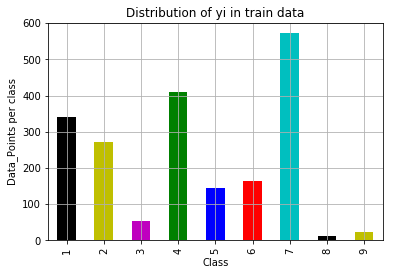

Number of data points in class 7 : 572 ( 28.7148594378% )
Number of data points in class 4 : 411 ( 20.6325301205% )
Number of data points in class 1 : 341 ( 17.1184738956% )
Number of data points in class 2 : 271 ( 13.6044176707% )
Number of data points in class 6 : 165 ( 8.28313253012% )
Number of data points in class 5 : 145 ( 7.27911646586% )
Number of data points in class 3 : 54 ( 2.71084337349% )
Number of data points in class 9 : 22 ( 1.10441767068% )
Number of data points in class 8 : 11 ( 0.552208835341% )


In [25]:
#Now lets see the distribution of class label in Train ,Test and Cross validate
Train_distribution = ((D_Train['Class'].value_counts())).sort_index()
Train_distribution.plot(kind = 'bar',color = 'kymgbrc')
plt.title('Distribution of yi in train data')
plt.xlabel("Class")
plt.ylabel("Data_Points per class")
plt.grid()
#print (Train_distribution)
plt.show()
for i in Train_distribution.sort_values(ascending=False).iteritems():
    percentage = (Train_distribution.loc[i[0]]/(D_Train.shape[0]))*100
    percent = str(percentage)+"%"
    print ("Number of data points in class",i[0],":",Train_distribution.loc[i[0]],"(",(percent),")")                                                                            
                                                                                  
    

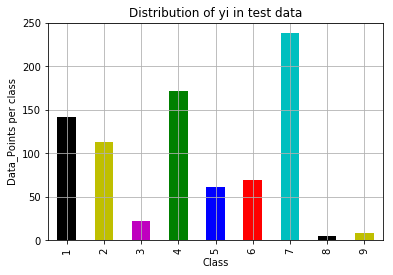

Number of data points in class 7 : 238 ( 28.6401925391% )
Number of data points in class 4 : 172 ( 20.697954272% )
Number of data points in class 1 : 142 ( 17.0878459687% )
Number of data points in class 2 : 113 ( 13.5980746089% )
Number of data points in class 6 : 69 ( 8.30324909747% )
Number of data points in class 5 : 61 ( 7.34055354994% )
Number of data points in class 3 : 22 ( 2.64741275572% )
Number of data points in class 9 : 9 ( 1.08303249097% )
Number of data points in class 8 : 5 ( 0.601684717208% )


In [37]:
Test_distribution = ((Test_dataframe['Class'].value_counts())).sort_index()
Test_distribution.plot(kind = 'bar',color = 'kymgbrc')
plt.title('Distribution of yi in test data')
plt.xlabel("Class")
plt.ylabel("Data_Points per class")
plt.grid()

plt.show()
for i in Test_distribution.sort_values(ascending=False).iteritems():
    percentage = (Test_distribution.loc[i[0]]/(Test_dataframe.shape[0]))*100
    percent = str(percentage)+"%"
    print ("Number of data points in class",i[0],":",Test_distribution.loc[i[0]],"(",(percent),")")                                                                            
                                                                                  

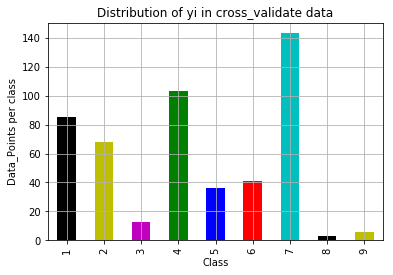

Number of data points in class 7 : 143 ( 28.7148594378% )
Number of data points in class 4 : 103 ( 20.6827309237% )
Number of data points in class 1 : 85 ( 17.0682730924% )
Number of data points in class 2 : 68 ( 13.6546184739% )
Number of data points in class 6 : 41 ( 8.23293172691% )
Number of data points in class 5 : 36 ( 7.22891566265% )
Number of data points in class 3 : 13 ( 2.61044176707% )
Number of data points in class 9 : 6 ( 1.20481927711% )
Number of data points in class 8 : 3 ( 0.602409638554% )


In [38]:
CrossValidation_distribution = ((D_Cross_Validate['Class'].value_counts())).sort_index()
CrossValidation_distribution.plot(kind = 'bar',color = 'kymgbrc')
plt.title('Distribution of yi in cross_validate data')
plt.xlabel("Class")
plt.ylabel("Data_Points per class")
plt.grid()

plt.show()
for i in CrossValidation_distribution.sort_values(ascending=False).iteritems():
    percentage = (CrossValidation_distribution.loc[i[0]]/(D_Cross_Validate.shape[0]))*100
    percent = str(percentage)+"%"
    print ("Number of data points in class",i[0],":",CrossValidation_distribution.loc[i[0]],"(",(percent),")")                                                                            
                                                                                  

Prediction using Random Model:-


In [122]:
length_test_dataset = Test_dataframe.shape[0]
length_cv_dataset = D_Cross_Validate.shape[0]
predict_y_cv = np.zeros((length_cv_dataset,9))
for i in range(length_cv_dataset):
    rand_probs = np.random.rand(1,9)
    predict_y_cv[i] = (rand_probs/sum(sum(rand_probs)))[0]
predict_y_test = np.zeros((length_test_dataset,9))
for i in range(length_test_dataset):
    rand_probs = np.random.rand(1,9)
    predict_y_test[i] = (rand_probs/sum(sum(rand_probs)))[0]

print("Log-loss on Cross validate data using random model:",log_loss(D_Cross_Validate_Y,predict_y_cv))
print("Log-loss on test data using random model:",log_loss(Test_Y,predict_y_test))



Log-loss on Cross validate data using random model: 2.50890409868
Log-loss on test data using random model: 2.48657318755


In [123]:
def conf_matrix(y_test,predicted_y):
    labels = [1,2,3,4,5,6,7,8,9]
    A = confusion_matrix(y_test,predicted_y)
    B = (((A.T)/(A.sum(axis=1))).T)
    C =(A/A.sum(axis=0))
    print ("#"*25,"Confusion_Matrix","#"*25)
    plt.figure(figsize=(25,9))
    sns.heatmap(A,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    print ("#"*25,"Precision","#"*25)
    plt.figure(figsize=(25,9))
    sns.heatmap(B,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    print ("#"*25,"Recall","#"*25)
    plt.figure(figsize=(25,9))
    sns.heatmap(C,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    

In [124]:
predicted_y =np.argmax(predict_y_test, axis=1)


######################### Confusion_Matrix #########################


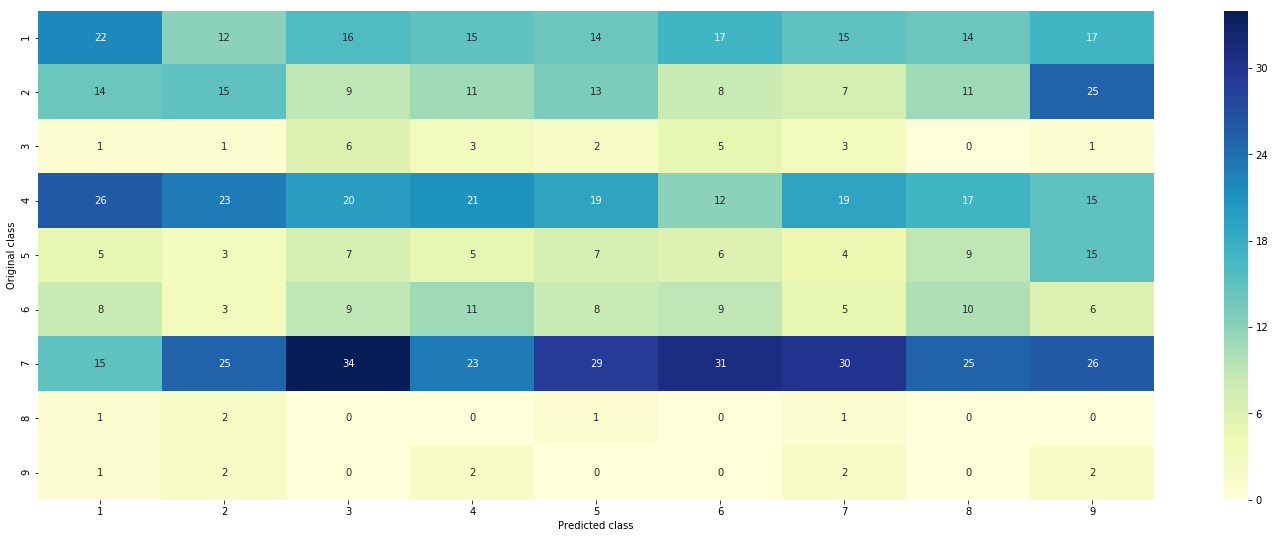

######################### Precision #########################


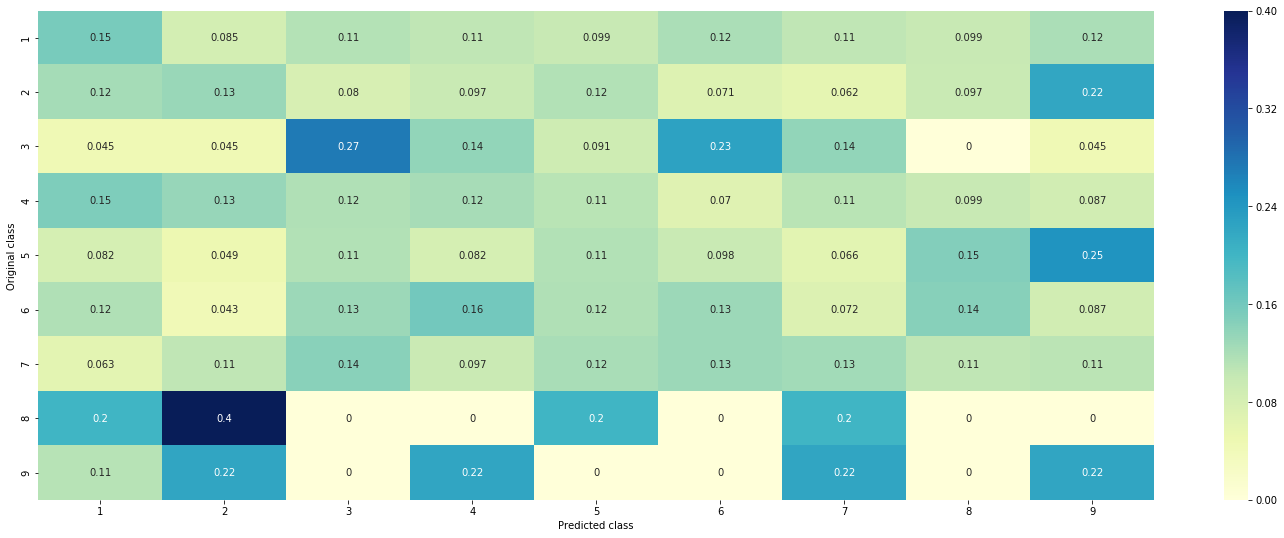

######################### Recall #########################


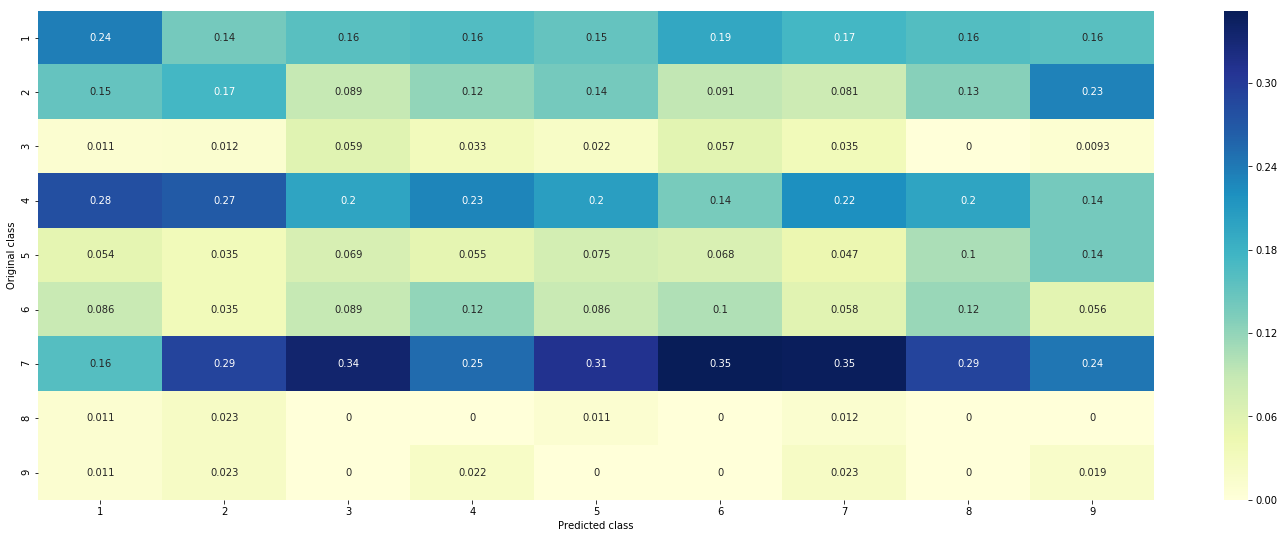

In [125]:
conf_matrix(Test_Y,predicted_y+1)